In [1]:
# Import all necessary packages #

import pennylane as qml
from pennylane.qnodes import PassthruQNode

import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np

import qutip as qt
from qutip import Bloch, basis

In [2]:
# Import python modules from vqe_function_states #

from vqe_function_states import init_cost_fn, run_vqe

In [3]:
dev_1 = qml.device("default.qubit", wires = 1)

def circuit(params, wires=0):
    qml.RX(params[0], wires=wires)
    qml.RY(params[1], wires=wires)

In [4]:
# Instantiate the cost function #

cost_function = init_cost_fn(dev = dev_1,
                             circuit = circuit, 
                             coeffs = [1,1],
                             obs = [qml.PauliX(0), qml.PauliZ(0)])

In [5]:
init_params = np.array([3.97507603, 3.00854038])    

In [6]:
# Run VQE iteration for quantum natural gradient descent #

qngd_cost_history, qngd_param_history, qngd_state_history, qngd_steps = run_vqe(cost_fn=cost_function,
                                                                                max_iter=500,
                                                                                initial_params=init_params,
                                                                                opt='QNGOptimizer',
                                                                                opt_step=0.01,
                                                                                dev = dev_1,
                                                                                diag_approx=True)

Iteration = 0 Energy = 0.51052556 Ha, Convergence parameter = 0.06664604 Ha State [-0.04155062+0.90465555j -0.41429449-0.09073015j]
Iteration = 20 Energy = -0.90729965 Ha, Convergence parameter = 0.05006082 Ha State [-0.26378523+0.59418788j -0.21507274-0.72876734j]
Iteration = 40 Energy = -1.35504644 Ha, Convergence parameter = 0.00713113 Ha State [-0.10774325+0.45233486j -0.05515645-0.88359625j]
Iteration = 60 Energy = -1.40833787 Ha, Convergence parameter = 0.00072399 Ha State [-0.03498876+0.40516354j -0.01551949-0.91344263j]
Iteration = 80 Energy = -1.41364035 Ha, Convergence parameter = 0.00007078 Ha State [-0.0110132+0.38977994j -0.0046618-0.92083037j]
Iteration = 100 Energy = -1.41415774 Ha, Convergence parameter = 0.00000689 Ha State [-0.00344465+0.38490603j -0.00143656-0.92294822j]

Final value of the ground-state energy = -1.41420585 Ha

Final state [-0.00135763+0.38355977j -0.00056386-0.92351488j]

Number of iterations =  116


In [7]:
# Run VQE iteration for gradient descent #

gd_cost_history, gd_param_history, gd_state_history, gd_steps = run_vqe(cost_fn=cost_function,
                                                                        max_iter=500,
                                                                        initial_params=init_params,
                                                                        opt='GradientDescentOptimizer',
                                                                        opt_step=0.01,
                                                                        dev = dev_1,
                                                                        diag_approx=False)

Iteration = 0 Energy = 0.56743624 Ha, Convergence parameter = 0.00973536 Ha State [-0.02863835+0.91086614j -0.40667969-0.06414313j]
Iteration = 20 Energy = 0.38709233 Ha, Convergence parameter = 0.00821261 Ha State [-0.06628716+0.87790241j -0.45679745-0.12739488j]
Iteration = 40 Energy = 0.24420954 Ha, Convergence parameter = 0.00616395 Ha State [-0.10651765+0.84358282j -0.49388286-0.18193882j]
Iteration = 60 Energy = 0.14079686 Ha, Convergence parameter = 0.00435028 Ha State [-0.14529227+0.8121159j  -0.51697675-0.22823882j]
Iteration = 80 Energy = 0.06758408 Ha, Convergence parameter = 0.00314443 Ha State [-0.18023787+0.78592784j -0.52681143-0.2688893j ]
Iteration = 100 Energy = 0.01128048 Ha, Convergence parameter = 0.00262544 Ha State [-0.21046957+0.76567573j -0.52441553-0.30729724j]
Iteration = 120 Energy = -0.04175219 Ha, Convergence parameter = 0.00278160 Ha State [-0.23582929+0.75072493j -0.5103436 -0.34690927j]
Iteration = 140 Energy = -0.10499504 Ha, Convergence parameter = 0.

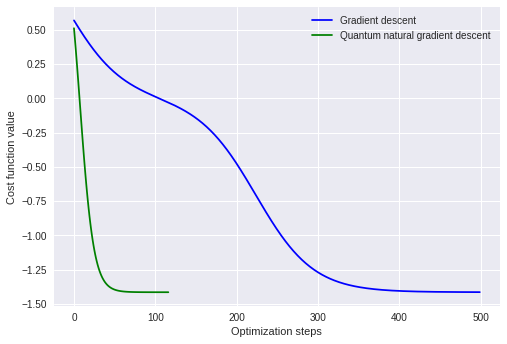

In [8]:
# Track energy history for both optimization methods #

plt.style.use("seaborn")
plt.plot(gd_cost_history, "b", label="Gradient descent")
plt.plot(qngd_cost_history, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

In [9]:
# Import python modules from visualization_function #

from visualization_function import plot_params, prepare_plot_states, plot_bloch_sphere

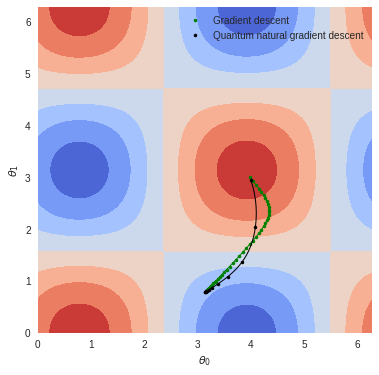

In [10]:
# Visualize the optimization path in the parameter space using a contour plot #

plot_params(gd_param_history=gd_param_history,
            qngd_param_history=qngd_param_history,
            plot_interval=10,
            figsize=[6,6],
            linewidth=1)

In [11]:
# Convert statevectors into coordinates for plotting on the bloch sphere #

qngd_x, qngd_y, qngd_z = prepare_plot_states(state_history=qngd_state_history)
gd_x, gd_y, gd_z = prepare_plot_states(state_history=gd_state_history)

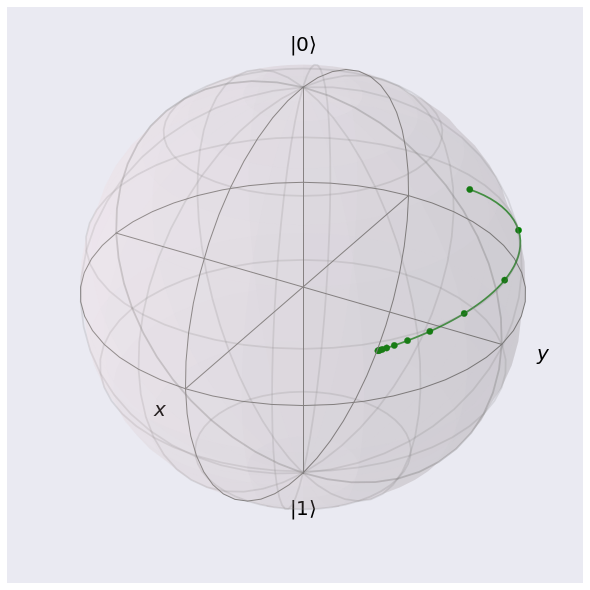

In [15]:
# Plot quantum natural gradient descent optimization path on the bloch sphere #

plot_bloch_sphere(opt_coords_x=qngd_x, 
                  opt_coords_y=qngd_y, 
                  opt_coords_z=qngd_z, 
                  plot_interval = 10, 
                  plot_color = 'g',
                  figsize = [8,8], 
                  pointsize = 40)

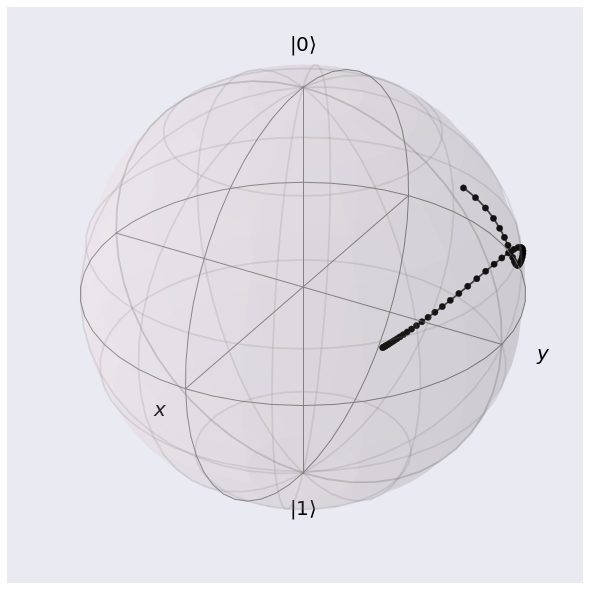

In [16]:
# Plot vanilla gradient descent optimization path on the bloch sphere #

plot_bloch_sphere(opt_coords_x=gd_x, 
                  opt_coords_y=gd_y, 
                  opt_coords_z=gd_z, 
                  plot_interval = 10, 
                  plot_color= 'k',
                  figsize = [8,8], 
                  pointsize = 40)